# Predict Heart Disease Status Based on Quantifiable Variables

### 1. Introduction:

Cardiovascular diseases (CVDs) is a class of disease that involves the heart or blood vessels. the number one cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
Our question is can we determine heart disease status based on quantifiable variables. This dataset we will be using is a tabular data set with comma-separated variables. It has 12 variables, 11 predictors variables and one target variable which is heart disease.

### 2.0.1 Attribute Information
1. Age: years
2. Sex: (0 = MALE, 1 = FEMALE)
3. ChestPainType: (ATA = 1, NAP = 2, ASY =3, TA =4)
4. RestingBP: resting blood pressure (mm HG)
5. Cholesterol: (mm/dl)
6. Fasting Blood Sugar: fasting blood sugar (1: if fastingBS >120 mg/dlm 0: otherwise)
7. RestingECG: Resting Electrocardiogram Results
8. MaxHR: maximum heart rate achieved (Numeric value between 60 and 202)
9. ExerciseAngina: exercise-induced angina (Y: Yes, N: No)
10. Oldpeak: (Numeric value measured in depression)
11. ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down:
downsloping)
12. HeartDisease:(1: heart disease, 0: Normal)

In [4]:
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

#### 2.0.2 Reading Files: Wrangling and Cleaning Data Set

In [5]:
heart_data <- read_csv("heart.csv") %>%
              mutate(HeartDisease = as_factor(HeartDisease))

head(heart_data)

Parsed with column specification:
cols(
  Age = col_double(),
  Sex = col_character(),
  ChestPainType = col_character(),
  RestingBP = col_double(),
  Cholesterol = col_double(),
  FastingBS = col_double(),
  RestingECG = col_character(),
  MaxHR = col_double(),
  ExerciseAngina = col_character(),
  Oldpeak = col_double(),
  ST_Slope = col_character(),
  HeartDisease = col_double()
)



Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


#### 2.0.3 Split data to train and test¶

In [6]:
set.seed(8)
heart_split <- initial_split(heart_data, prop = 0.75, strata = HeartDisease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

#### 2.0.4 Summarize dataset

In [7]:
set.seed(8)
num_obs <- nrow(heart_train)
heart_sum <- heart_train %>%
             glimpse() %>%
             group_by(HeartDisease) %>%
             summarize(count = n(), percentage = n()/ num_obs* 100)
heart_sum 

checking_for_na <- sum(is.na(heart_train))
checking_for_na

summary(heart_train)

Rows: 689
Columns: 12
$ Age            <dbl> 40, 49, 37, 48, 39, 45, 37, 58, 39, 49, 42, 54, 38, 60…
$ Sex            <chr> "M", "F", "M", "F", "M", "F", "M", "M", "M", "M", "F",…
$ ChestPainType  <chr> "ATA", "NAP", "ATA", "ASY", "NAP", "ATA", "ASY", "ATA"…
$ RestingBP      <dbl> 140, 160, 130, 138, 120, 130, 140, 136, 120, 140, 115,…
$ Cholesterol    <dbl> 289, 180, 283, 214, 339, 237, 207, 164, 204, 234, 211,…
$ FastingBS      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ RestingECG     <chr> "Normal", "Normal", "ST", "Normal", "Normal", "Normal"…
$ MaxHR          <dbl> 172, 156, 98, 108, 170, 170, 130, 99, 145, 140, 137, 1…
$ ExerciseAngina <chr> "N", "N", "N", "Y", "N", "N", "Y", "Y", "N", "Y", "N",…
$ Oldpeak        <dbl> 0.0, 1.0, 0.0, 1.5, 0.0, 0.0, 1.5, 2.0, 0.0, 1.0, 0.0,…
$ ST_Slope       <chr> "Up", "Flat", "Up", "Flat", "Up", "Up", "Flat", "Flat"…
$ HeartDisease   <fct> 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, …


`summarise()` ungrouping output (override with `.groups` argument)



HeartDisease,count,percentage
<fct>,<int>,<dbl>
0,308,44.70247
1,381,55.29753


[1] 0

      Age            Sex            ChestPainType        RestingBP    
 Min.   :28.00   Length:689         Length:689         Min.   :  0.0  
 1st Qu.:47.00   Class :character   Class :character   1st Qu.:120.0  
 Median :54.00   Mode  :character   Mode  :character   Median :130.0  
 Mean   :53.53                                         Mean   :132.8  
 3rd Qu.:60.00                                         3rd Qu.:140.0  
 Max.   :77.00                                         Max.   :200.0  
  Cholesterol      FastingBS       RestingECG            MaxHR      
 Min.   :  0.0   Min.   :0.0000   Length:689         Min.   : 63.0  
 1st Qu.:173.0   1st Qu.:0.0000   Class :character   1st Qu.:120.0  
 Median :222.0   Median :0.0000   Mode  :character   Median :138.0  
 Mean   :198.5   Mean   :0.2293                      Mean   :136.8  
 3rd Qu.:267.0   3rd Qu.:0.0000                      3rd Qu.:156.0  
 Max.   :564.0   Max.   :1.0000                      Max.   :202.0  
 ExerciseAngina     

#### 2.0.5 Observations from Summary
1. Resting BP and Cholesterol have zero as a minimum which is unusual.
2. There may be outliers/Missings in Cholesterol and Resting BP being presented as zero.
3. Number of rows 689 and number of columns 12.
4. Percentage of people with heart disease: 44.70 %
5. Percentage of people without heart disease: 55.30%

#### 2.0.6 Fixing zeros in and Resting BP and CHolesterol

In [8]:
set.seed(8)
heart_train <- heart_train%>%
               filter(RestingBP != 0, Cholesterol != 0)
count(heart_train)
summary(heart_train)
head(heart_train)

n
<int>
562


      Age            Sex            ChestPainType        RestingBP    
 Min.   :28.00   Length:562         Length:562         Min.   : 92.0  
 1st Qu.:46.00   Class :character   Class :character   1st Qu.:120.0  
 Median :54.00   Mode  :character   Mode  :character   Median :130.0  
 Mean   :52.94                                         Mean   :133.7  
 3rd Qu.:60.00                                         3rd Qu.:140.0  
 Max.   :77.00                                         Max.   :200.0  
  Cholesterol      FastingBS       RestingECG            MaxHR    
 Min.   : 85.0   Min.   :0.0000   Length:562         Min.   : 69  
 1st Qu.:206.0   1st Qu.:0.0000   Class :character   1st Qu.:122  
 Median :236.0   Median :0.0000   Mode  :character   Median :140  
 Mean   :243.3   Mean   :0.1655                      Mean   :140  
 3rd Qu.:274.8   3rd Qu.:0.0000                      3rd Qu.:160  
 Max.   :564.0   Max.   :1.0000                      Max.   :202  
 ExerciseAngina        Oldpeak    

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


#### 2.0.7 Visualizations of data

We will visualise each predictor variable to see how much it factors into a person having heart disease or not. Accuracy of predictor variables isn’t directly proportional to the number of variables to use. In our case we have 11 possible predictors and it would be impossible to take them all into account when making a classification. So we analyse each of the eleven variables separately and see its correlation with heart disease by making eleven different graphs.

Note that in our data set
0: No heart Disease 1: Heart Disease

##### 1. Heart Disease with Age

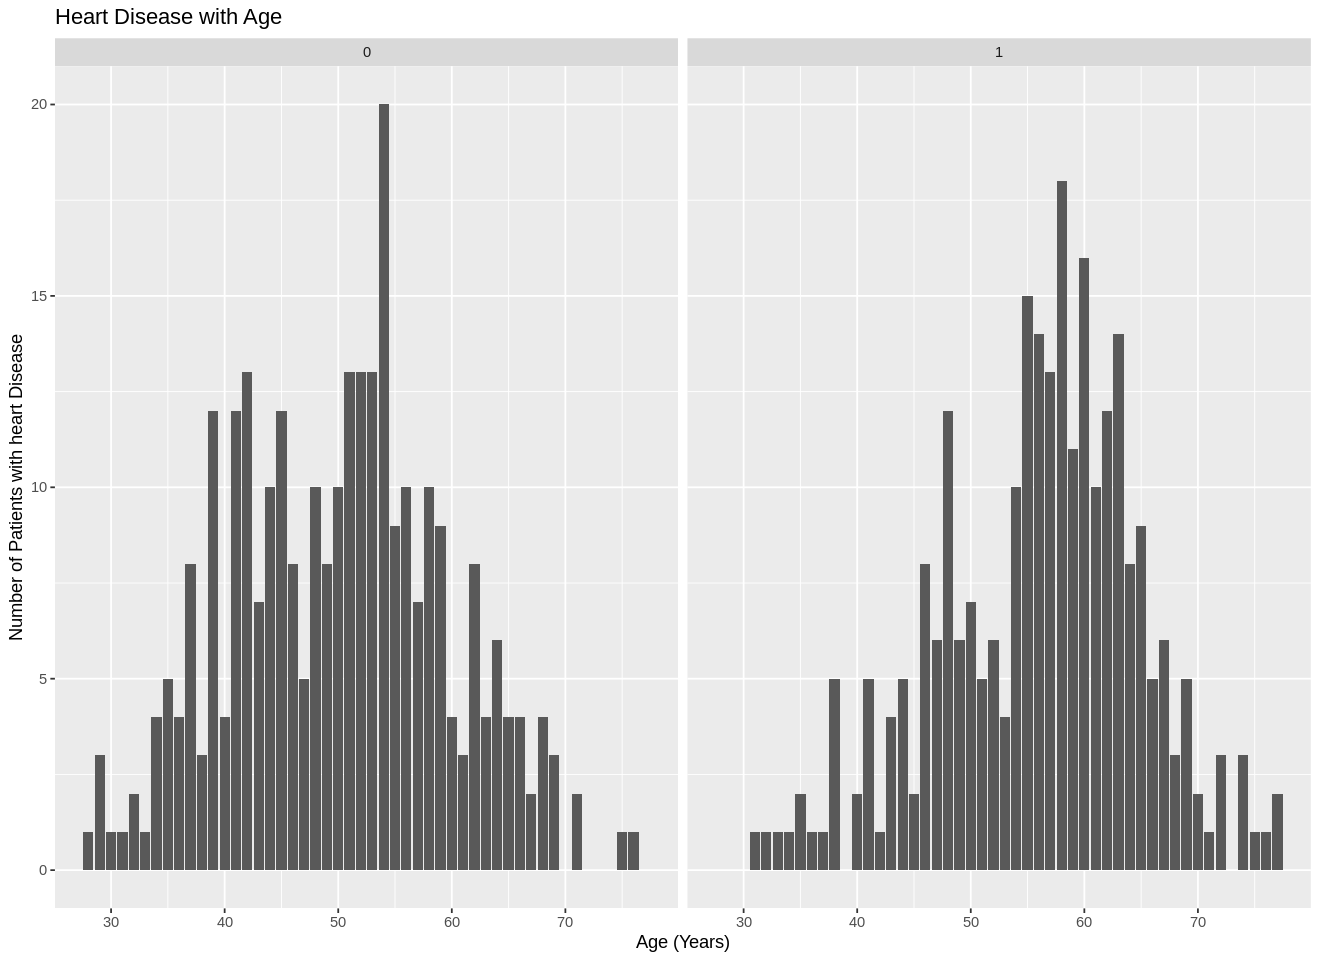

In [9]:
set.seed(8)
HeartDisease_Age_plot <- heart_train %>%
                         ggplot(aes(x = Age, fill = Age)) +
                         geom_bar() +
                         facet_grid(~HeartDisease) +
                         labs(title = "Heart Disease with Age", x = "Age (Years)", 
                              y = "Number of Patients with heart Disease")
options(repr.plot.width = 11, repr.plot.height = 8)

HeartDisease_Age_plot

Figure 1: The graph above explores the relationship between heart disease and age. By looking at the graphs we can see that people between the ages of 55-65 seem to have the most heart diseases. So this seems like a good predictor variable to use.

##### 2. Heart Disease with Sex

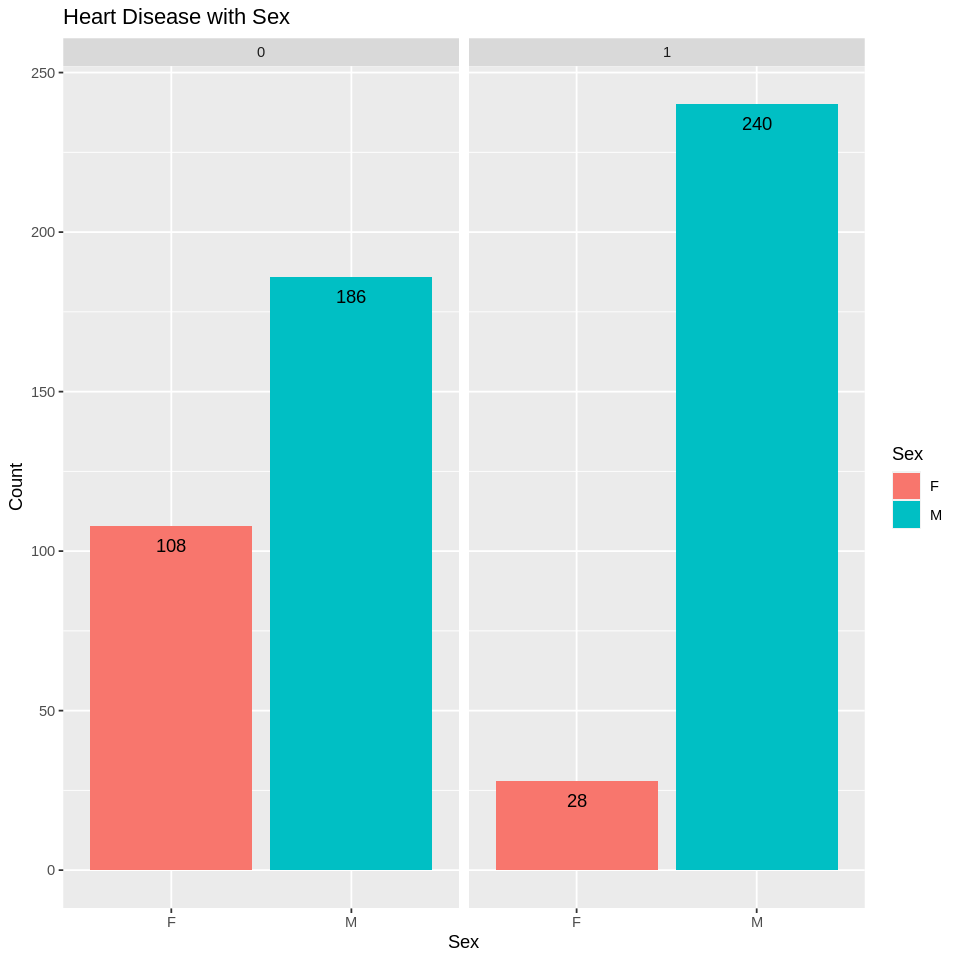

In [10]:
set.seed(8)
HeartDisease_Sex_plot <- heart_train %>%
                         ggplot(aes(x = Sex, fill = Sex)) +
                         geom_bar() +
                         facet_grid(~HeartDisease) +
                         geom_text(aes(label = ..count..), stat = "count",  vjust = 2, colour = "black") +
                         labs(title = "Heart Disease with Sex", x = "Sex", y = "Count", fill = "Sex")
options(repr.plot.width = 8, repr.plot.height = 8)
HeartDisease_Sex_plot

Figure 2: There seems to be a storng coorleation between sex and heart diseases. As we can see from the graph above it makes sense to use it as one of our predictor variables.

##### 3. Heart Disease vs. Chest Pain Type: 
TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic

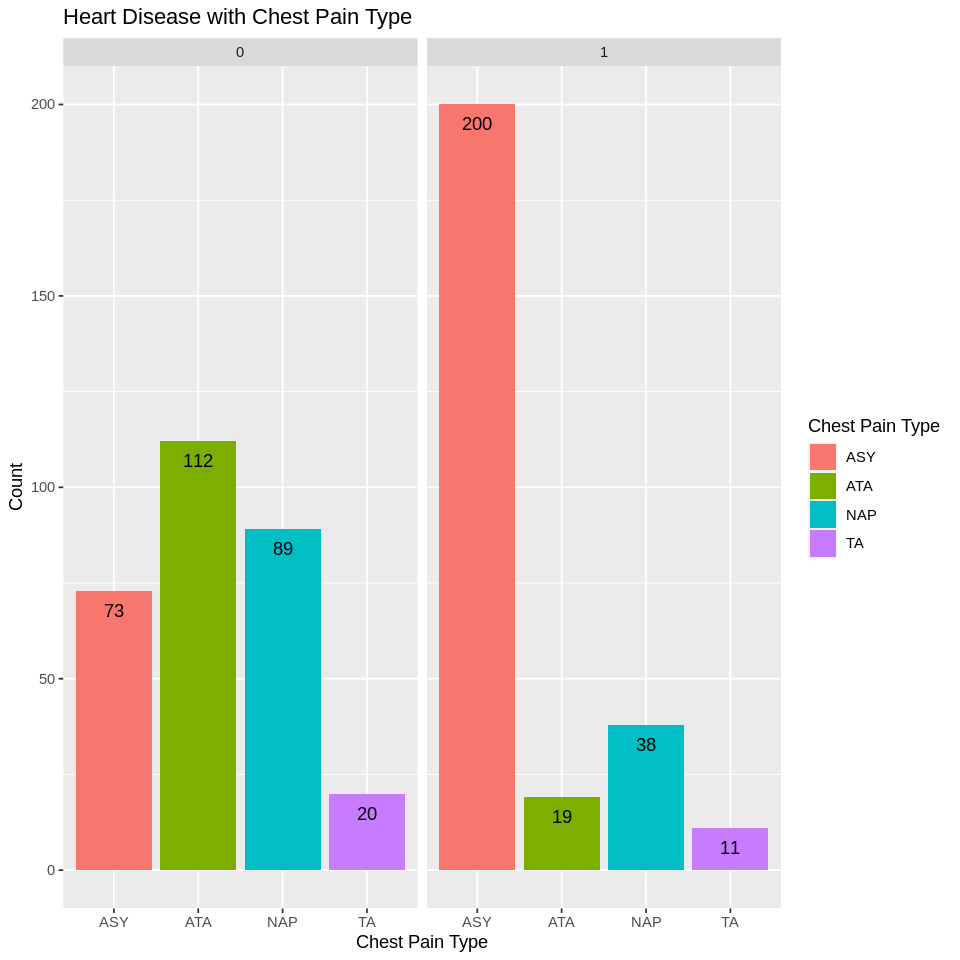

In [11]:
set.seed(8)
HeartDisease_ChestPainType_plot <- heart_train %>%
                                   ggplot(aes(x = ChestPainType, fill = ChestPainType)) +
                                   geom_bar() +
                                   facet_grid(~HeartDisease) +
                                   geom_text(aes(label = ..count..), stat = "count",  vjust = 2, colour = "black") +
                                   labs(title = "Heart Disease with Chest Pain Type", x = "Chest Pain Type", y = "Count", 
                                        fill = "Chest Pain Type")
HeartDisease_ChestPainType_plot

Figure 3: The above graph shows the relationship between the type of chest pain and heart disease. People with ASY chest pain seem to be more likely to have heart disease.

##### 4. Heart Disease vs. Resting Blood Pressure (mm HG):

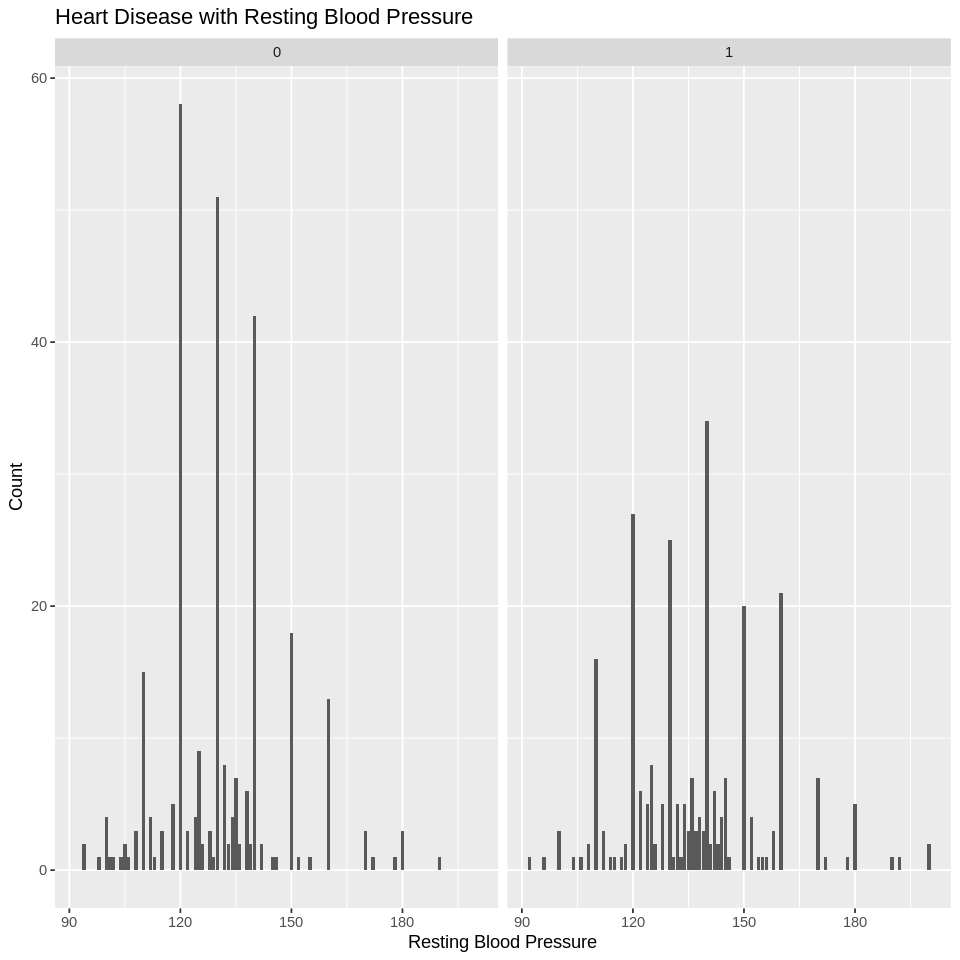

In [12]:
set.seed(8)
HeartDisease_RestingBP_plot <- heart_train %>%
                               ggplot(aes(x = RestingBP, fill = RestingBP)) +
                               geom_bar() +
                               facet_grid(~HeartDisease) +
                               labs(title = "Heart Disease with Resting Blood Pressure", x = "Resting Blood Pressure", y = "Count") 
options(repr.plot.width = 8, repr.plot.height = 8)         

HeartDisease_RestingBP_plot

Figure 4: There doesn’t seem to be any strong correlation between the resting blood pressure of a person and heart disease.

##### 5. Heart Disease vs. Cholesterol (mm/dl):

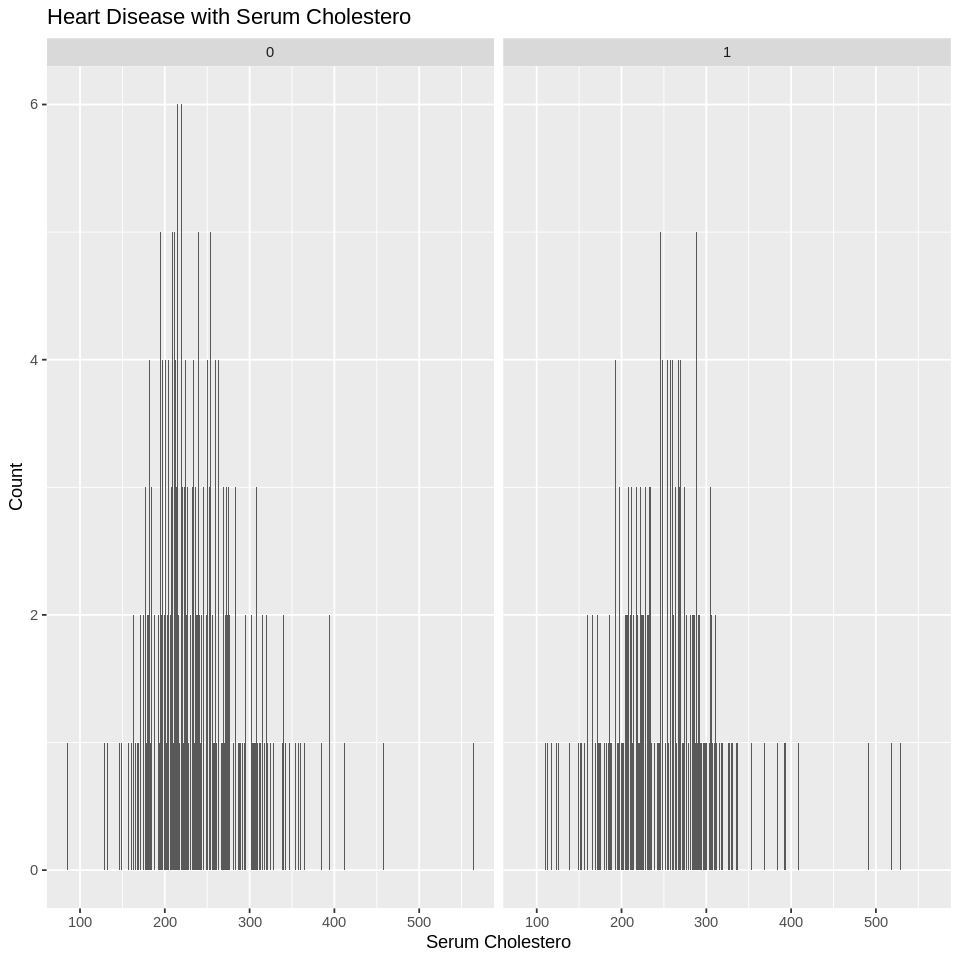

In [13]:
set.seed(8)
HeartDisease_Cholesterol_plot <- heart_train %>%
                                 ggplot(aes(x = Cholesterol, fill = Cholesterol)) +
                                 facet_grid(~HeartDisease) +
                                 geom_bar() +
                                 labs(title = "Heart Disease with Serum Cholestero", x = "Serum Cholestero", y = "Count") 
options(repr.plot.width = 8, repr.plot.height = 8)         

HeartDisease_Cholesterol_plot

Figure 5: There doesn’t seem to be any kind of relationship between cholesterol and heart disease, so it doesn’t make sense to use it as a predictor variable.

##### 6. Heart Disease vs. Fasting Blood Suagr:

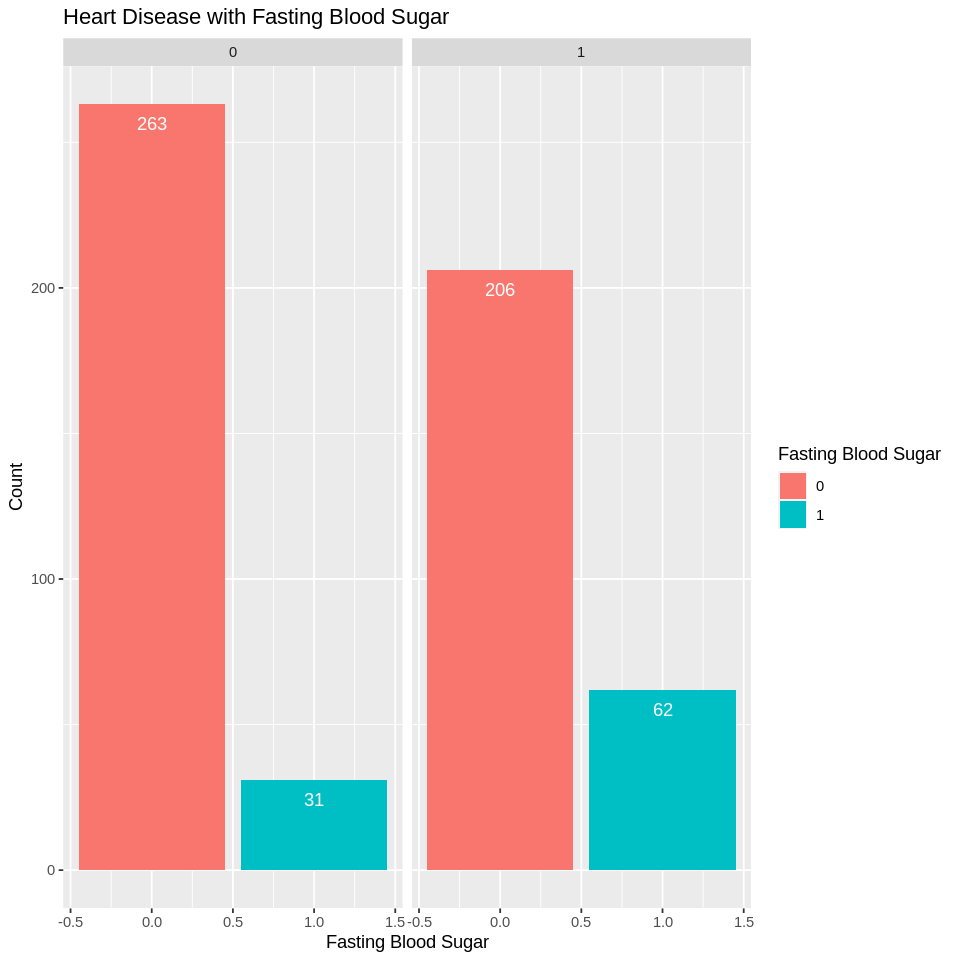

In [14]:
set.seed(8)
HeartDisease_FastingBS_plot <- heart_train %>%
                               ggplot(aes(x = FastingBS, fill = as.character(FastingBS))) +
                               geom_bar() +
                               facet_grid(~HeartDisease) +
                               geom_text(aes(label = ..count..), stat = "count",  vjust = 2, colour = "white") +
                               labs(title = "Heart Disease with Fasting Blood Sugar", 
                                    x = "Fasting Blood Sugar", y = "Count", fill = "Fasting Blood Sugar")
HeartDisease_FastingBS_plot

Figure 6: There doesn’t seem to be any kind of relationship between fasting blood sugar and heart disease, so it doesn’t make sense to use it as a predictor variable.

##### 7. Heart Disease vs. Resting Electrocardiogram Results: 
Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy by Estes’ criteria

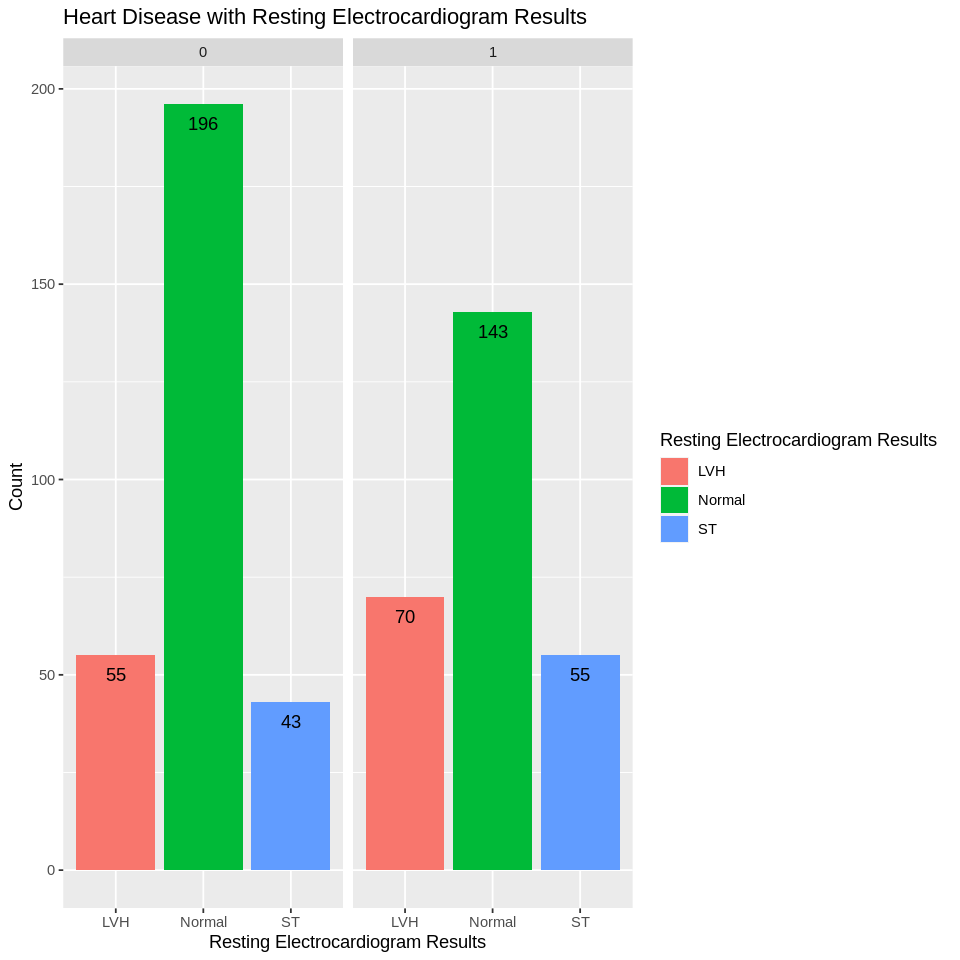

In [15]:
set.seed(8)
HeartDisease_RestingECG_plot <- heart_train %>%
                                ggplot(aes(x = RestingECG, fill = RestingECG)) +
                                geom_bar() +
                                facet_grid(~HeartDisease) +
                                geom_text(aes(label = ..count..), stat = "count",  vjust = 2, colour = "black") +
                                labs(title = "Heart Disease with Resting Electrocardiogram Results", 
                                     x = "Resting Electrocardiogram Results", y = "Count", 
                                     fill = "Resting Electrocardiogram Results")
HeartDisease_RestingECG_plot

Figure 7: There seems to be a weak positive relationship between the Resting ECG and whether a person has heart disease or not. People with a normal resting ECG are more likely to face cardiovascular problems. However there’s not a strong enough relationship to make it a predictor variable.

##### 8. Heart Disease vs. Maximum Heart Rate: 
Maximum Heart Rate: Numeric value between 60 and 202

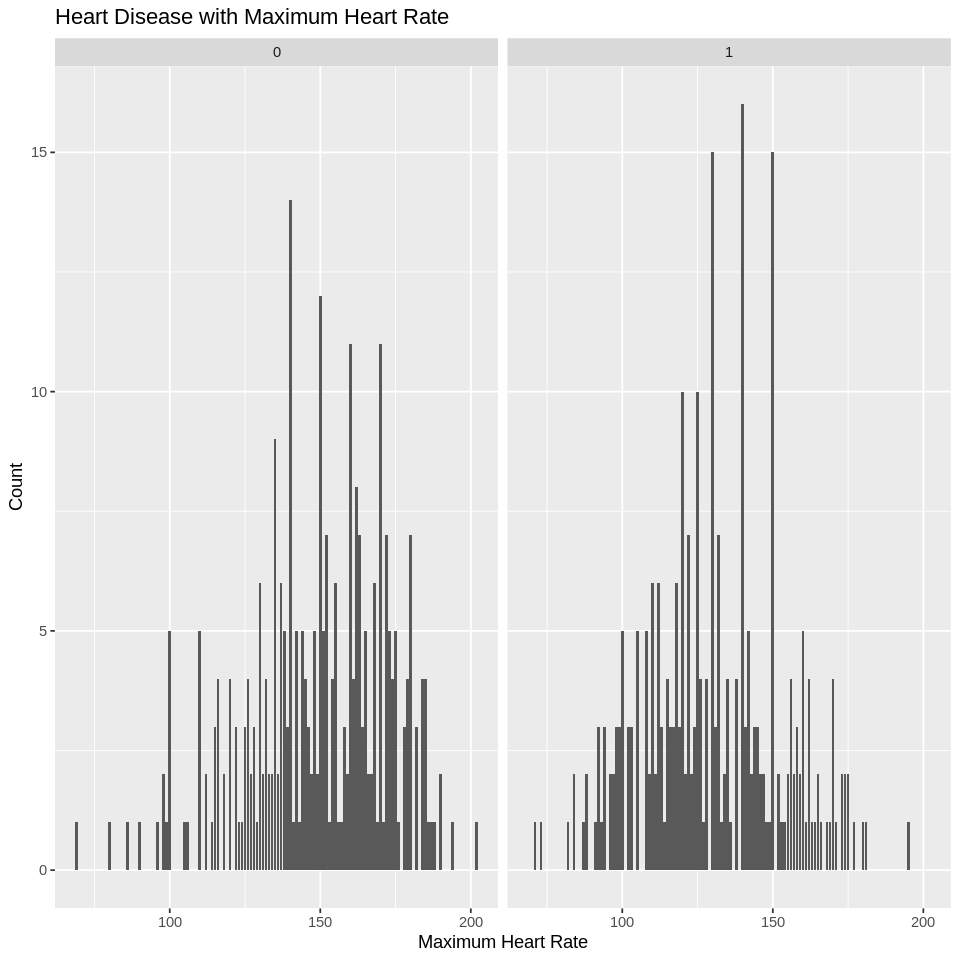

In [16]:
set.seed(8)
HeartDisease_RestingBP_plot <- heart_train %>%
                               ggplot(aes(x = MaxHR, fill = MaxHR)) +
                               facet_grid(~HeartDisease) +
                               geom_bar() +
                               labs(title = "Heart Disease with Maximum Heart Rate", x = "Maximum Heart Rate", y = "Count") 
options(repr.plot.width = 8, repr.plot.height = 8)         

HeartDisease_RestingBP_plot

Figure 8: People with a maximum heart rate in the range of 100-150 are more likely to have heart disease. However there’s an overlap between people who have heart disease and those who don’t have heart in the same range. It increases and decreases rapidly instead of going in one direction. So it doesn’t make sense to use it as a predictor variable.

##### 9. Heart Disease vs. Exercise-Induced Angina: 
Y: The person has Exercise-Induced Angina N: The perosn doesn’t have Exercise-Induced Angina

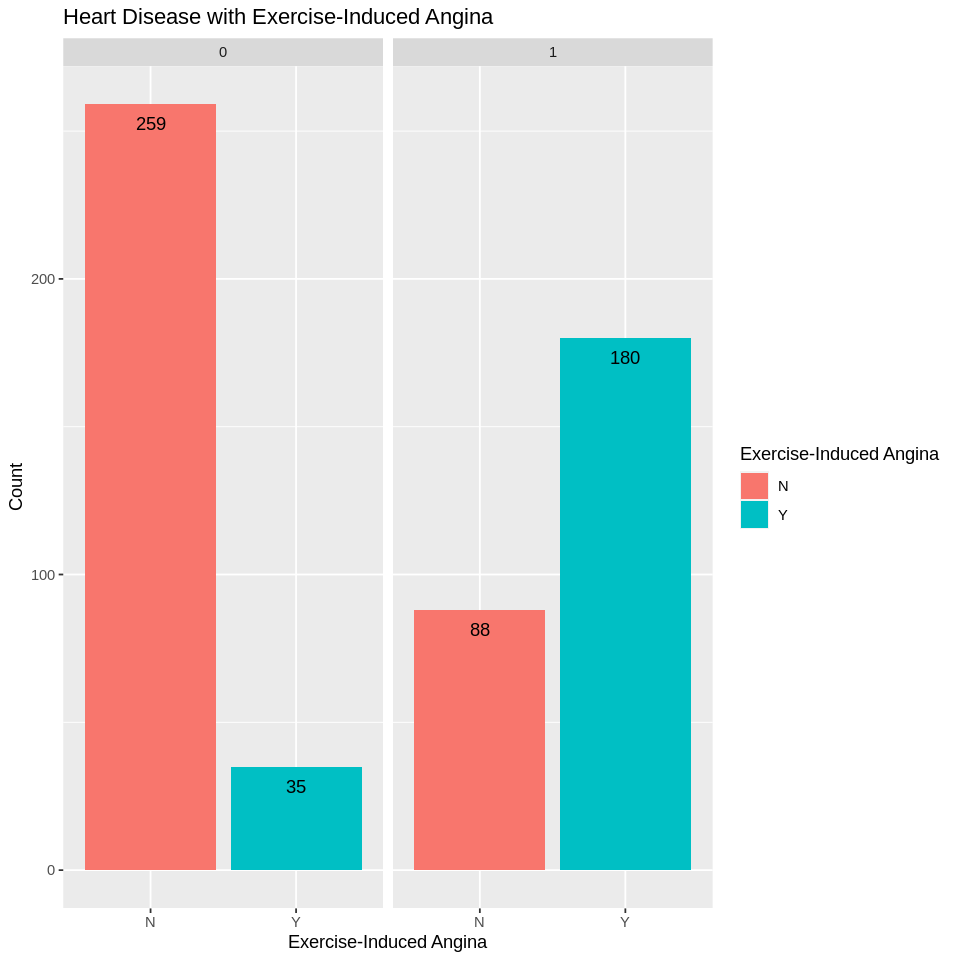

In [17]:
set.seed(8)
HeartDisease_ExerciseAngina_plot <- heart_train %>%
                                    ggplot(aes(x = ExerciseAngina, fill = ExerciseAngina)) +
                                    geom_bar() +
                                    facet_grid(~HeartDisease) +
                                    geom_text(aes(label = ..count..), stat = "count",  vjust = 2, colour = "black") +
                                    labs(title = "Heart Disease with Exercise-Induced Angina", 
                                         x = "Exercise-Induced Angina", y = "Count", 
                                         fill = "Exercise-Induced Angina")
HeartDisease_ExerciseAngina_plot 

Figure 9: There seems to be a strong relationship between exercise-Induced Angina and Heart Disease. People with no exercise angina are more likely to have heart disease.

##### 10. Heart Disease vs. Old peak: 
Old peak is numeric value measured in depression.

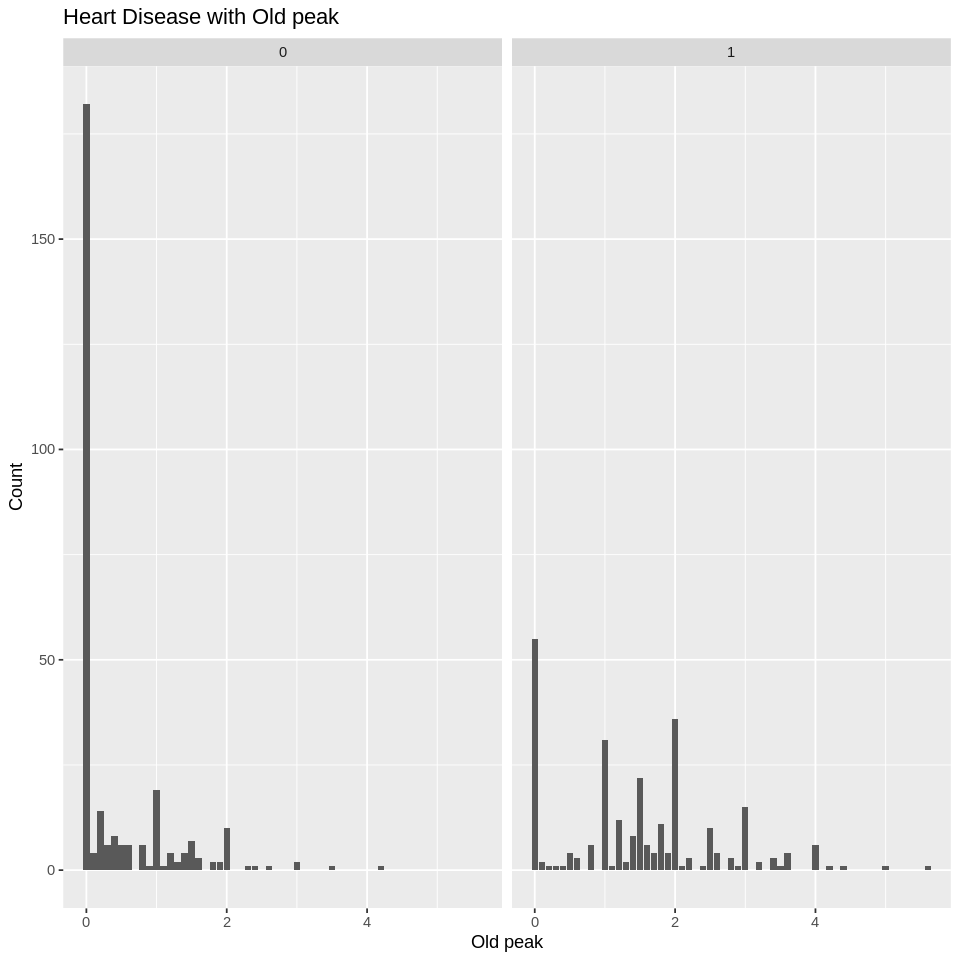

In [18]:
set.seed(8)
HeartDisease_RestingBP_plot <- heart_train %>%
                               ggplot(aes(x = Oldpeak, fill = Oldpeak)) +
                               facet_grid(~HeartDisease) +
                               geom_bar() +
                               labs(title = "Heart Disease with Old peak", x = "Old peak", y = "Count") 
options(repr.plot.width = 8, repr.plot.height = 8)         

HeartDisease_RestingBP_plot

Figure 10: There’s a weak relationship between old peka and heart disease, but it’s not strong enough to make it a predictor variable.

##### 11. Heart Disease vs. ST_Slope: 
ST_Slope: the slope of the peak exercise ST segment Up: upsloping, Flat: flat, Down: downsloping

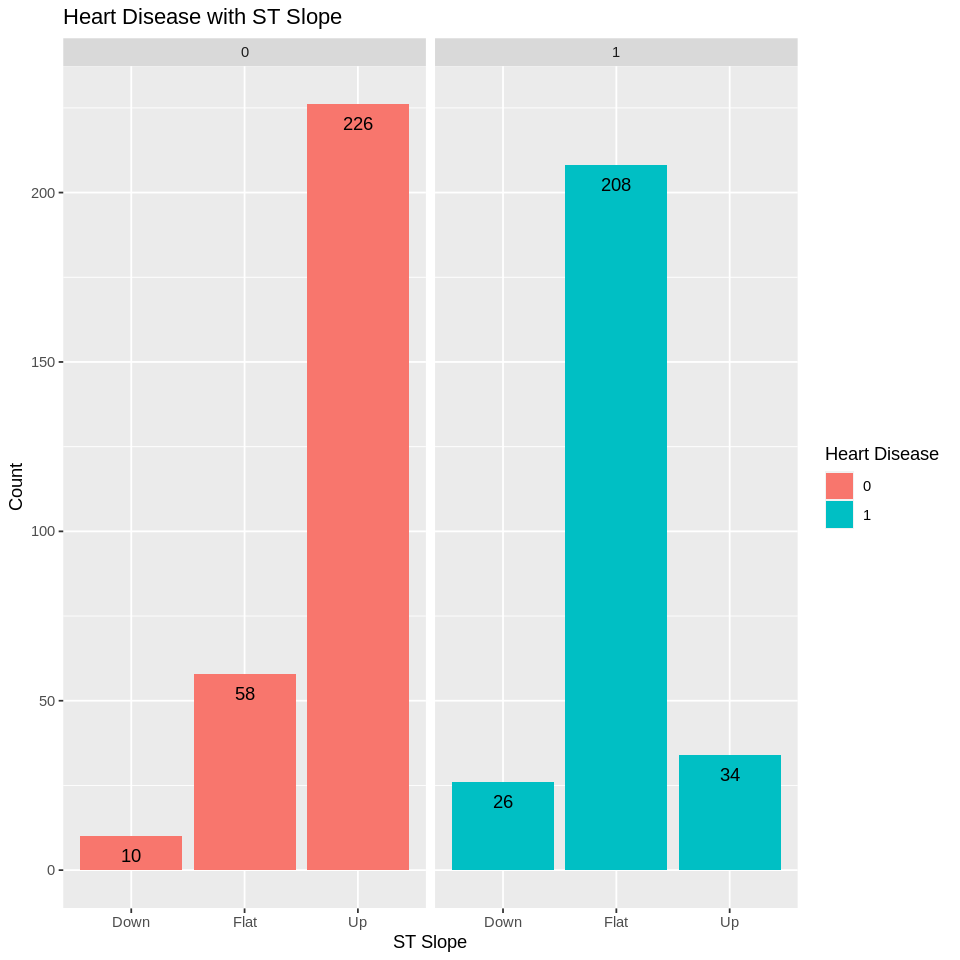

In [19]:
set.seed(8)
HeartDisease_ST_Slope_plot <- heart_train %>%
                              ggplot(aes(x = ST_Slope, fill = HeartDisease)) +
                              geom_bar() +
                              facet_grid(~HeartDisease) +
                              geom_text(aes(label = ..count..), stat = "count",  vjust = 2, colour = "black") +
                              labs(title = "Heart Disease with ST Slope", x = "ST Slope", y = "Count", fill = "Heart Disease")

HeartDisease_ST_Slope_plot

Figure 11: There’s a relationship between ST_slope and heart disease. If the St_slope is up then the person is more likely to have a heart disease, whereas if the St_slope is flat then the person is more likely to.

#### 2.0.5 Summary of Exploratory data analysis:

From the above 11 grpahs we can conclude htat we will only have five predicotr avriable: age, sex, ExerciseAngina, ST_Slope and chest pain type. Generally accuracy of a predictor model isn’t directly proportional to the number of variables that we use. So it wouldn’t make sense to use all 11 variables as our predictors, which is why we narrowed down our choices.


### 3. Data Analysis:

Since we have our five predictor variables and one target variable, we will now make a prediction model to classify future patients and determine whether they have heart disease or not.

#### Covert Charaters to Nummerics

We convert the columns of sex, chest Pain type, ST_Slope and Exercise Aginaia to numerical values as we can’t standrize data with characters. The other predictor variable age is already stored as numeric value so no need to convert it.

In [20]:
set.seed(8)
heart_train <- heart_train %>%
                 mutate(Sex = as_factor(Sex)) %>%
                 mutate(Sex = as.numeric(Sex)) %>%
                 mutate(ChestPainType = as_factor(ChestPainType)) %>%
                 mutate(ChestPainType = as.numeric(ChestPainType)) %>%
                 mutate(ExerciseAngina = as_factor(ExerciseAngina)) %>%
                 mutate(ExerciseAngina = as.numeric(ExerciseAngina)) %>%
                 mutate(ST_Slope = as_factor(ST_Slope)) %>%
                 mutate(ST_Slope = as.numeric(ST_Slope))


heart_test <- heart_test%>%
              mutate(Sex = as_factor(Sex)) %>%
              mutate(Sex = as.numeric(Sex)) %>%
              mutate(ChestPainType = as_factor(ChestPainType)) %>%
              mutate(ChestPainType = as.numeric(ChestPainType)) %>%
              mutate(ExerciseAngina = as_factor(ExerciseAngina)) %>%
              mutate(ExerciseAngina = as.numeric(ExerciseAngina)) %>%
              mutate(ST_Slope = as_factor(ST_Slope)) %>%
              mutate(ST_Slope = as.numeric(ST_Slope))

#### 3.0.1 Summay
Age + Sex + ChestPainType + MaxHR

In [21]:
set.seed(8)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
            set_engine("kknn") %>%
            set_mode("classification")

heart_recipe <- recipe(HeartDisease ~ Age + Sex + ChestPainType + MaxHR, data = heart_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

preprocessed_data <- heart_recipe %>% 
                     prep() %>%
                     bake(heart_train)

heart_vfold <- vfold_cv(heart_train, v = 5, strata = HeartDisease)

heart_workflow <- workflow() %>% 
                  add_recipe(heart_recipe) %>%
                  add_model(knn_tune)

gridvals <- tibble(neighbors = seq(from = 1, to = 20))

heart_results <- heart_workflow %>%
                tune_grid(resamples = heart_vfold, grid = gridvals) %>% 
               collect_metrics()

heart_min <- heart_results %>%
             filter(.metric == "accuracy") %>%
             arrange(mean) %>%
             head(n = 1)

accuracy_versus_k <- ggplot(heart_results, aes(x = neighbors, y = mean))+ 
                     geom_point() +
                     geom_line() +
                     labs(x = "Neighbors", y = "Accuracy Estimate")

k_min <- heart_min %>%
         pull(neighbors)

knn_best <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>% 
            set_engine("kknn") %>%
            set_mode("classification")

heart_best_fit <- workflow() %>% 
                  add_recipe(heart_recipe) %>%
                  add_model(knn_best) %>%
                  fit(data = heart_train)

heart_test <- heart_test%>%
              mutate(Sex = as_factor(Sex)) %>%
              mutate(Sex = as.numeric(Sex)) %>%
              mutate(ChestPainType = as_factor(ChestPainType)) %>%
              mutate(ChestPainType = as.numeric(ChestPainType))

heart_test_predictions <- predict(heart_best_fit, heart_test) %>%
                          bind_cols(heart_test)

heart_summary <- heart_test_predictions %>% 
                 metrics(truth = HeartDisease, estimate = .pred_class)

heart_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6462882
kap,binary,0.3022232


#### 3.0.2 Summay
ST_Slope + Sex + ChestPainType + MaxHR

In [22]:
set.seed(8)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
            set_engine("kknn") %>%
            set_mode("classification")

heart_recipe <- recipe(HeartDisease ~ ST_Slope + Sex + ChestPainType + MaxHR, data = heart_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

preprocessed_data <- heart_recipe %>% 
                     prep() %>%
                     bake(heart_train)

heart_vfold <- vfold_cv(heart_train, v = 5, strata = HeartDisease)

heart_workflow <- workflow() %>% 
                  add_recipe(heart_recipe) %>%
                  add_model(knn_tune)

gridvals <- tibble(neighbors = seq(from = 1, to = 20))

heart_results <- heart_workflow %>%
                tune_grid(resamples = heart_vfold, grid = gridvals) %>% 
               collect_metrics()

heart_min <- heart_results %>%
             filter(.metric == "accuracy") %>%
             arrange(mean) %>%
             head(n = 1)

accuracy_versus_k <- ggplot(heart_results, aes(x = neighbors, y = mean))+ 
                     geom_point() +
                     geom_line() +
                     labs(x = "Neighbors", y = "Accuracy Estimate")

k_min <- heart_min %>%
         pull(neighbors)

knn_best <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>% 
            set_engine("kknn") %>%
            set_mode("classification")

heart_best_fit <- workflow() %>% 
                  add_recipe(heart_recipe) %>%
                  add_model(knn_best) %>%
                  fit(data = heart_train)

heart_test_predictions <- predict(heart_best_fit, heart_test) %>%
                          bind_cols(heart_test)

heart_summary <- heart_test_predictions %>% 
                 metrics(truth = HeartDisease, estimate = .pred_class)

heart_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7467249
kap,binary,0.4989437


#### 3.0.3 Summay
Age + Cholesterol + Oldpeak + MaxHR + FastingBS

In [23]:
set.seed(8)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
            set_engine("kknn") %>%
            set_mode("classification")

heart_recipe <- recipe(HeartDisease ~ Age + Cholesterol + Oldpeak + MaxHR + FastingBS, data = heart_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

preprocessed_data <- heart_recipe %>% 
                     prep() %>%
                     bake(heart_train)

heart_vfold <- vfold_cv(heart_train, v = 5, strata = HeartDisease)

heart_workflow <- workflow() %>% 
                  add_recipe(heart_recipe) %>%
                  add_model(knn_tune)


gridvals <- tibble(neighbors = seq(from = 1, to = 20))


heart_results <- heart_workflow %>%
                tune_grid(resamples = heart_vfold, grid = gridvals) %>% 
               collect_metrics()

heart_min <- heart_results %>%
             filter(.metric == "accuracy") %>%
             arrange(mean) %>%
             head(n = 1)

accuracy_versus_k <- ggplot(heart_results, aes(x = neighbors, y = mean))+ 
                     geom_point() +
                     geom_line() +
                     labs(x = "Neighbors", y = "Accuracy Estimate")

k_min <- heart_min %>%
         pull(neighbors)

knn_best <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>% 
            set_engine("kknn") %>%
            set_mode("classification")

heart_best_fit <- workflow() %>% 
                  add_recipe(heart_recipe) %>%
                  add_model(knn_best) %>%
                  fit(data = heart_train)

heart_test <- heart_test%>%
              mutate(ST_Slope = as_factor(ST_Slope)) %>%
              mutate(ST_Slope = as.numeric(ST_Slope))

heart_test_predictions <- predict(heart_best_fit, heart_test) %>%
                          bind_cols(heart_test)

heart_summary <- heart_test_predictions %>% 
                 metrics(truth = HeartDisease, estimate = .pred_class)

heart_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6724891
kap,binary,0.3490126


#### 3.0.4 Summay
ExerciseAngina + ST_Slope + Sex + ChestPainType

In [24]:
set.seed(8)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
            set_engine("kknn") %>%
            set_mode("classification")

heart_recipe <- recipe(HeartDisease ~ ExerciseAngina + ST_Slope + Sex + ChestPainType, data = heart_train) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

heart_vfold <- vfold_cv(heart_train, v = 5, strata = HeartDisease)

heart_workflow <- workflow() %>% 
                  add_recipe(heart_recipe) %>%
                  add_model(knn_tune)

gridvals <- tibble(neighbors = seq(from = 1, to = 20))


heart_results <- heart_workflow %>%
                 tune_grid(resamples = heart_vfold, grid = gridvals) %>% 
                 collect_metrics()

heart_min <- heart_results %>%
             filter(.metric == "accuracy") %>%
             arrange(mean) %>%
             head(n = 1)

accuracy_versus_k <- ggplot(heart_results, aes(x = neighbors, y = mean))+ 
                     geom_point() +
                     geom_line() +
                     labs(x = "Neighbors", y = "Accuracy Estimate")

k_min <- heart_min %>%
         pull(neighbors)

knn_best <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>% 
            set_engine("kknn") %>%
            set_mode("classification")

heart_best_fit <- workflow() %>% 
                  add_recipe(heart_recipe) %>%
                  add_model(knn_best) %>%
                  fit(data = heart_train)

heart_test_predictions <- predict(heart_best_fit, heart_test) %>%
                          bind_cols(heart_test)

heart_summary <- heart_test_predictions %>% 
                 metrics(truth = HeartDisease, estimate = .pred_class)

heart_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8296943
kap,binary,0.6569354


### 4. Expected outcomes and significance:
We expect to find that the 4 predictor variables: age, sex, chest pain type, and maximum heart rate will help us tell if a person has heart disease or not, as there’s a strong correlation between each predictor variable and heart disease. The impact of these findings would be very significant. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidemia or already established disease) need early detection and management wherein a machine learning model can be of great help. In the future, we should try to improve the accuracy of the overall algorithm by adding more predictor variables and having a large sample scale for the data. This same technique can then be applied to detect other types of diseases such as pneumonia in patients. The algorithm removes human error and there’s very little chance of the algorithm misdiagnosing someone if it has a strong accuracy.